In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### The dataset is loaded into a DataFrame named `data` from the CSV file "Housing.csv" using the `pandas` library.

In [2]:
data = pd.read_csv("Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### The `housing.csv` dataset contains 13 columns:  
- **Numerical:** `price`, `area`, `bedrooms`, `bathrooms`, `stories`, `parking`  
- **Categorical:** `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, `furnishingstatus`


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


This code generates histograms for all numerical columns in the `housing.csv` dataset, allowing visualization of the distribution and spread of values like `price`, `area`, `bedrooms`, etc., with black edges for clarity and a shared title for context.


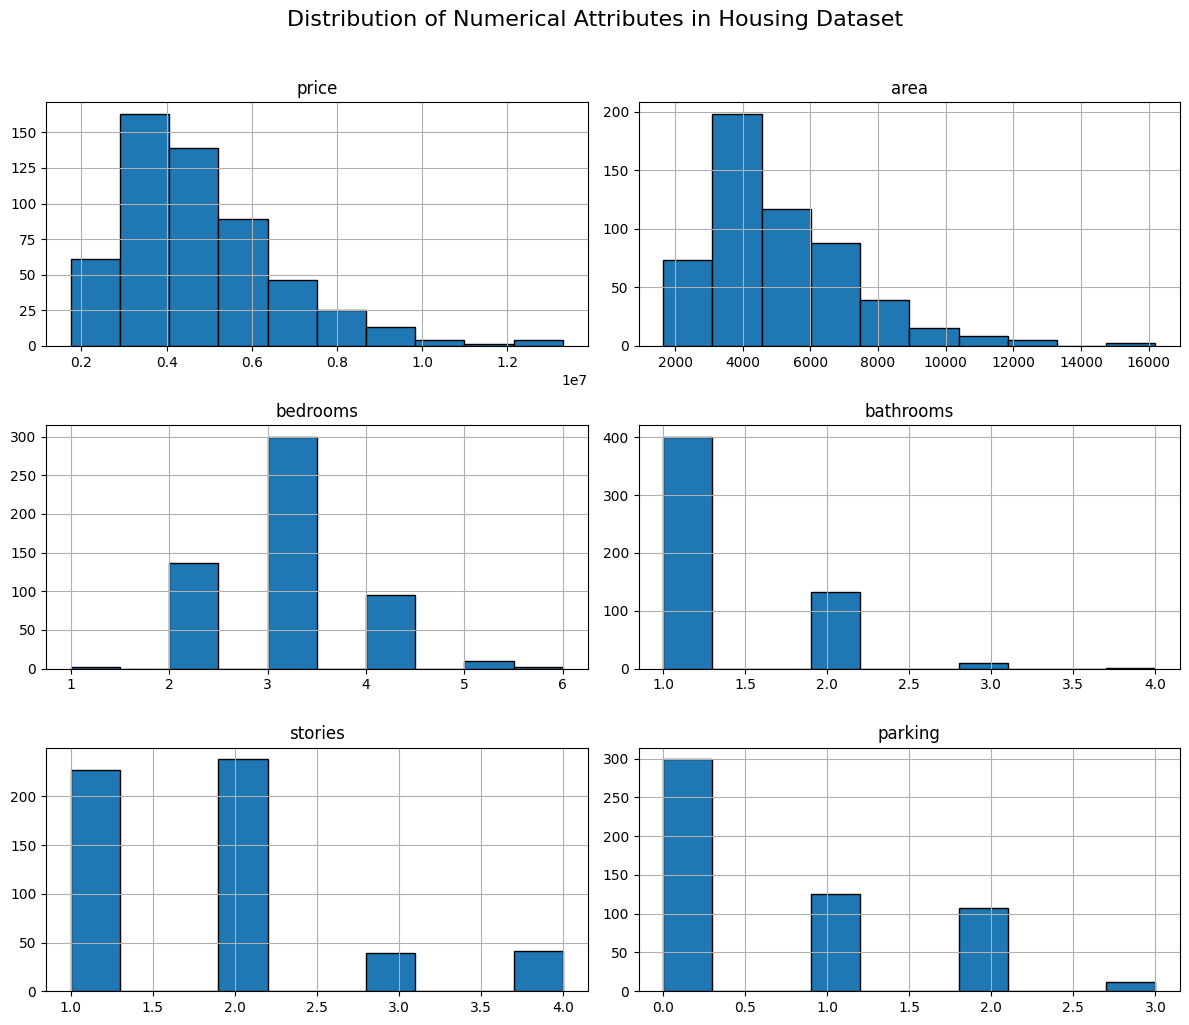

In [48]:
# Plot distribution of all numeric columns
data.hist(figsize=(12, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Attributes in Housing Dataset', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

This code visualizes the distribution of the target variable `price` using a histogram with 30 bins and a KDE (Kernel Density Estimate) curve to show the probability density, helping identify skewness, spread, and potential outliers in housing prices.


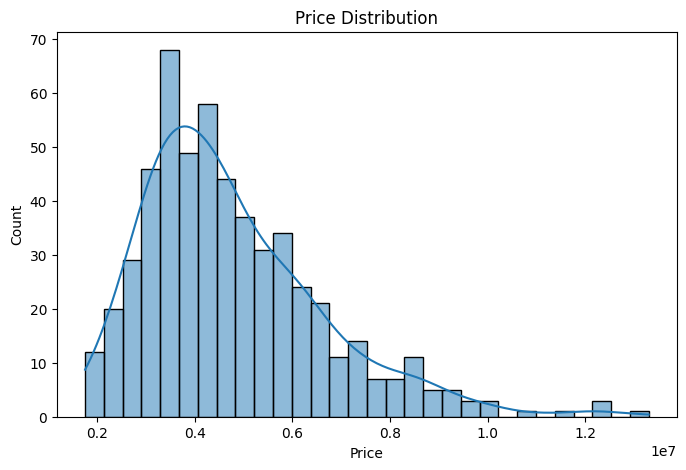

In [ ]:
#  Distribution of Target Variable ('price')
plt.figure(figsize=(8,5))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

This code calculates and prints the number of unique categories (classes) for each categorical feature in the `housing.csv` dataset.  
The output shows:
- Binary features like `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, and `prefarea` have 2 classes each.
- `parking` has 4 distinct values, indicating varying levels of parking space.It is a numerical dataset
- `furnishingstatus` has 3 categories, representing different furnishing types.

In [10]:
num_classes = data['mainroad'].nunique()
print(f"Total number of classes in 'mainroad': {num_classes}")
num_classes = data['guestroom'].nunique()
print(f"Total number of classes in 'guestroom': {num_classes}")
num_classes = data['basement'].nunique()
print(f"Total number of classes in 'basement': {num_classes}")
num_classes = data['hotwaterheating'].nunique()
print(f"Total number of classes in 'hotwaterheating': {num_classes}")
num_classes = data['airconditioning'].nunique()
print(f"Total number of classes in 'airconditioning': {num_classes}")
num_classes = data['parking'].nunique()
print(f"Total number of classes in 'parking': {num_classes}")
num_classes = data['prefarea'].nunique()
print(f"Total number of classes in 'prefarea': {num_classes}")
num_classes = data['furnishingstatus'].nunique()
print(f"Total number of classes in 'furnishingstatus': {num_classes}")



Total number of classes in 'mainroad': 2
Total number of classes in 'guestroom': 2
Total number of classes in 'basement': 2
Total number of classes in 'hotwaterheating': 2
Total number of classes in 'airconditioning': 2
Total number of classes in 'parking': 4
Total number of classes in 'prefarea': 2
Total number of classes in 'furnishingstatus': 3


This code defines a list of categorical columns and applies one-hot encoding to them using `pd.get_dummies`, converting each category into binary indicator variables. The parameter `drop_first=True` avoids multicollinearity by dropping the first category of each feature. The resulting `df_encoded` DataFrame is ready for machine learning models.

In [ ]:
categorical_cols = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea',
    'furnishingstatus'
]

# Apply one-hot encoding
# data-set after applying one hot encoding
df_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [17]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


This code separates the dataset into features (`X`) and the target variable (`y`), where `X` contains all columns except `price`, and `y` contains only the `price` column, which is the target for regression modeling.

In [20]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

This code splits the data into training and testing sets using an 80-20 ratio with a fixed `random_state` for reproducibility. It then imports necessary modules for linear regression and evaluation metrics like MAE, MSE, and R² to assess model performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code initializes a Linear Regression model and trains it using the training data (`X_train` and `y_train`), allowing the model to learn the relationship between features and the target variable `price`.

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

This code uses the trained Linear Regression model to predict housing prices on the test dataset features (`X_test`), generating the predicted values stored in `y_pred`.

In [ ]:
y_pred = model.predict(X_test)

The `model.coef_` array gives the coefficient values for each feature in the model, representing their impact on the predicted house price:

- `area`: 511,615.56  
- `bedrooms`: 56,615.57  
- `bathrooms`: 549,420.50  
- `stories`: 353,158.43  
- `parking`: 193,542.78  
- `mainroad_yes`: 367,919.95  
- `guestroom_yes`: 231,610.04  
- `basement_yes`: 390,251.18  
- `hotwaterheating_yes`: 684,649.89  
- `airconditioning_yes`: 791,426.74  
- `prefarea_yes`: 629,890.57  
- `furnishingstatus_semi-furnished`: -126,881.82  
- `furnishingstatus_unfurnished`: -413,645.06  

Positive coefficients increase the predicted price, while negative coefficients decrease it.

In [49]:
model.coef_

array([ 511615.56377666,   56615.57245779,  549420.50124098,
        353158.42985604,  193542.78167455,  367919.94767957,
        231610.03717565,  390251.17618109,  684649.88533879,
        791426.73584319,  629890.56531336, -126881.81758511,
       -413645.06222822])

The evaluation metrics for the linear regression model on the test set are:  
- **MAE:** 970,043.40 
- **MSE:** 1,754,318,687,330.66
- **R² Score:** 0.6529 — the model explains approximately 65.29% of the variance in housing prices, showing a moderate fit.

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 970043.40
MSE: 1754318687330.66
R² Score: 0.6529


This code standardizes the feature matrix `X` using `StandardScaler`, which scales each numerical feature to have zero mean and unit variance. This preprocessing step helps improve model performance by normalizing feature scales, especially for algorithms sensitive to feature magnitude.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

After applying standardization to the features, the model's evaluation metrics (MAE, MSE, and R² Score) remain essentially the same. This happens because linear regression models in scikit-learn are **scale-invariant**—they internally adjust coefficients to account for feature scaling. Standardizing features mainly helps models sensitive to feature scale or improves training stability, but for ordinary least squares linear regression, the predictive performance (R²) does not change.

In [ ]:
#Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score (Model Accuracy): {r2:.4f}")

MAE: 970043.40
MSE: 1754318687330.67
R² Score (Model Accuracy): 0.6529
